In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pygad
from pygad import torchga

In [2]:
input_layer = torch.nn.Linear(28*28, 200)
relu_layer = torch.nn.ReLU()
dense_layer = torch.nn.Linear(200, 10)
output_layer = torch.nn.Softmax(1)

model = torch.nn.Sequential(input_layer,
                            relu_layer,
                            dense_layer,
                            output_layer)

In [3]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [4]:
import numpy as np

In [5]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

C:\Users\ivank\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data, 
                                          batch_size= 10000, 
                                          shuffle=True,
                                          num_workers = 1),
    
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100, 
                                          shuffle=True)
}
for batch_idx, (data, target) in enumerate(loaders['train']):
    data_inputs = data
    data_outputs = target

In [7]:
loss_list = []
acc_list = []
correct = 0
total = 0
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, torch_ga, model, loss_function
    data_inputs = data_inputs.view(-1, 28*28) 
    predictions = pygad.torchga.predict(model=model,
                                        solution=solution,
                                        data=data_inputs)
    predictions_no_grad = predictions.detach()
    solution_fitness = 1.0 / (loss_function(predictions_no_grad , data_outputs).numpy() + 0.00000001)
    loss = loss_function(predictions_no_grad , data_outputs)
    loss_list.append(loss.item())
    
    _, predicted = torch.max(predictions.data, 1)
    global correct
    global total
    correct += (predicted == target).sum().item()
    total += target.size(0)
    acc_list.append(correct / total)
    
    return solution_fitness

def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [8]:
torch_ga = torchga.TorchGA(model=model,
                           num_solutions=100)

loss_function = torch.nn.CrossEntropyLoss()

In [9]:
initial_population = torch_ga.population_weights # Initial population of network weights.

# Create an instance of the pygad.GA class
ga_instance = pygad.GA(num_generations=1000,
                       sol_per_pop=100,
                       crossover_type="two_points",
                       parent_selection_type="rank",
                       mutation_percent_genes = 10,
                       num_parents_mating=2,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)


Generation = 1
Fitness    = 0.4397500150510203
Generation = 2
Fitness    = 0.44208937984724755
Generation = 3
Fitness    = 0.4471458386410208
Generation = 4
Fitness    = 0.4484063251705003
Generation = 5
Fitness    = 0.4513282962407873
Generation = 6
Fitness    = 0.4513282962407873
Generation = 7
Fitness    = 0.4543770849502284
Generation = 8
Fitness    = 0.4543770849502284
Generation = 9
Fitness    = 0.4602962342171511
Generation = 10
Fitness    = 0.46263760437221213
Generation = 11
Fitness    = 0.4626851177862596
Generation = 12
Fitness    = 0.46554702033468814
Generation = 13
Fitness    = 0.470767341199605
Generation = 14
Fitness    = 0.470767341199605
Generation = 15
Fitness    = 0.47147263147136176
Generation = 16
Fitness    = 0.47147263147136176
Generation = 17
Fitness    = 0.47166349869301094
Generation = 18
Fitness    = 0.4732920776996616
Generation = 19
Fitness    = 0.47547453375155807
Generation = 20
Fitness    = 0.48067982269068676
Generation = 21
Fitness    = 0.482515430374

Generation = 171
Fitness    = 0.5281173430784722
Generation = 172
Fitness    = 0.5281173430784722
Generation = 173
Fitness    = 0.5281173430784722
Generation = 174
Fitness    = 0.5281173430784722
Generation = 175
Fitness    = 0.5285837977530375
Generation = 176
Fitness    = 0.5285837977530375
Generation = 177
Fitness    = 0.5286304985375023
Generation = 178
Fitness    = 0.5288450884069494
Generation = 179
Fitness    = 0.5292131858915468
Generation = 180
Fitness    = 0.5294702869330872
Generation = 181
Fitness    = 0.5294702869330872
Generation = 182
Fitness    = 0.5294702869330872
Generation = 183
Fitness    = 0.5294702869330872
Generation = 184
Fitness    = 0.5294702869330872
Generation = 185
Fitness    = 0.5305453820911427
Generation = 186
Fitness    = 0.5307695895796891
Generation = 187
Fitness    = 0.5316685536152432
Generation = 188
Fitness    = 0.5316685536152432
Generation = 189
Fitness    = 0.5332552847291221
Generation = 190
Fitness    = 0.5332552847291221
Generation = 191
Fit

Generation = 339
Fitness    = 0.5672392464065803
Generation = 340
Fitness    = 0.5674384649804846
Generation = 341
Fitness    = 0.5674384649804846
Generation = 342
Fitness    = 0.5674384649804846
Generation = 343
Fitness    = 0.5674384649804846
Generation = 344
Fitness    = 0.5675902366118889
Generation = 345
Fitness    = 0.5676388222187699
Generation = 346
Fitness    = 0.5676388222187699
Generation = 347
Fitness    = 0.5676388222187699
Generation = 348
Fitness    = 0.5676388222187699
Generation = 349
Fitness    = 0.5681216732762688
Generation = 350
Fitness    = 0.5683720331305102
Generation = 351
Fitness    = 0.5684157070254244
Generation = 352
Fitness    = 0.5684157070254244
Generation = 353
Fitness    = 0.5684157070254244
Generation = 354
Fitness    = 0.5684157070254244
Generation = 355
Fitness    = 0.5684157070254244
Generation = 356
Fitness    = 0.5684157070254244
Generation = 357
Fitness    = 0.5689960431776976
Generation = 358
Fitness    = 0.5695547489786735
Generation = 359
Fit

Fitness    = 0.574035177009165
Generation = 507
Fitness    = 0.574035177009165
Generation = 508
Fitness    = 0.574035177009165
Generation = 509
Fitness    = 0.574035177009165
Generation = 510
Fitness    = 0.574035177009165
Generation = 511
Fitness    = 0.574035177009165
Generation = 512
Fitness    = 0.574035177009165
Generation = 513
Fitness    = 0.574035177009165
Generation = 514
Fitness    = 0.574035177009165
Generation = 515
Fitness    = 0.574035177009165
Generation = 516
Fitness    = 0.5744450567724688
Generation = 517
Fitness    = 0.5756788872242213
Generation = 518
Fitness    = 0.5756788872242213
Generation = 519
Fitness    = 0.5756788872242213
Generation = 520
Fitness    = 0.5756788872242213
Generation = 521
Fitness    = 0.5756788872242213
Generation = 522
Fitness    = 0.5756788872242213
Generation = 523
Fitness    = 0.5756788872242213
Generation = 524
Fitness    = 0.5758352972091815
Generation = 525
Fitness    = 0.5758352972091815
Generation = 526
Fitness    = 0.575835297209181

Fitness    = 0.6051409991934992
Generation = 675
Fitness    = 0.6051409991934992
Generation = 676
Fitness    = 0.6052093252932731
Generation = 677
Fitness    = 0.6052093252932731
Generation = 678
Fitness    = 0.6052093252932731
Generation = 679
Fitness    = 0.6052093252932731
Generation = 680
Fitness    = 0.6052167482267771
Generation = 681
Fitness    = 0.6053942979148136
Generation = 682
Fitness    = 0.6057686945269096
Generation = 683
Fitness    = 0.6059098472624544
Generation = 684
Fitness    = 0.6059098472624544
Generation = 685
Fitness    = 0.6064823075604439
Generation = 686
Fitness    = 0.6064823075604439
Generation = 687
Fitness    = 0.6068121335038169
Generation = 688
Fitness    = 0.6068121335038169
Generation = 689
Fitness    = 0.607277869290946
Generation = 690
Fitness    = 0.607277869290946
Generation = 691
Fitness    = 0.6076027519940382
Generation = 692
Fitness    = 0.6076027519940382
Generation = 693
Fitness    = 0.6076027519940382
Generation = 694
Fitness    = 0.6076027

Generation = 842
Fitness    = 0.6126601670047208
Generation = 843
Fitness    = 0.6126601670047208
Generation = 844
Fitness    = 0.6128617222890986
Generation = 845
Fitness    = 0.6128617222890986
Generation = 846
Fitness    = 0.6128617222890986
Generation = 847
Fitness    = 0.6128617222890986
Generation = 848
Fitness    = 0.6128617222890986
Generation = 849
Fitness    = 0.6128617222890986
Generation = 850
Fitness    = 0.6128617222890986
Generation = 851
Fitness    = 0.6128617222890986
Generation = 852
Fitness    = 0.6128617222890986
Generation = 853
Fitness    = 0.6128617222890986
Generation = 854
Fitness    = 0.6128617222890986
Generation = 855
Fitness    = 0.6128617222890986
Generation = 856
Fitness    = 0.6128617222890986
Generation = 857
Fitness    = 0.6128617222890986
Generation = 858
Fitness    = 0.6128617222890986
Generation = 859
Fitness    = 0.6128617222890986
Generation = 860
Fitness    = 0.6128617222890986
Generation = 861
Fitness    = 0.6128617222890986
Generation = 862
Fit

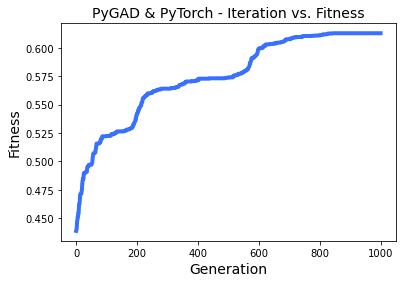

Fitness value of the best solution = 0.6128687520366358
Index of the best solution : 0
Crossentropy :  1.6316707
Accuracy :  0.8293


In [10]:

# Start the genetic algorithm evolution.
ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness(title="PyGAD & PyTorch - Iteration vs. Fitness", linewidth=4)

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = torchga.model_weights_as_dict(model=model,
                                                        weights_vector=solution)
model.load_state_dict(best_solution_weights)
predictions = model(data_inputs)
# print("Predictions : \n", predictions)

# Calculate the crossentropy loss of the trained model.
print("Crossentropy : ", loss_function(predictions, data_outputs).detach().numpy())

# Calculate the classification accuracy for the trained model.
accuracy = torch.sum(torch.max(predictions, axis=1).indices == data_outputs) / len(data_outputs)
print("Accuracy : ", accuracy.detach().numpy())

In [19]:
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import LinearAxis, Range1d

p = figure(y_axis_label='Loss', width=1000, y_range=(0, 1), title='results')
p.extra_y_ranges = {'Accuracy': Range1d(start=0, end=100)}
p.add_layout(LinearAxis(y_range_name='Accuracy', axis_label='Accuracy (%)'), 'right')
p.line(np.arange(len(loss_list)), loss_list)
p.line(np.arange(len(loss_list)), np.array(acc_list) * 100, y_range_name='Accuracy', color='red')
show(p)